<a href="https://colab.research.google.com/github/krec7748/DeepLearning_Study/blob/main/Jacobian%20Matrix%20%26%20Backpropagation/CH04_Linear_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Linear Regression (1 Feature)

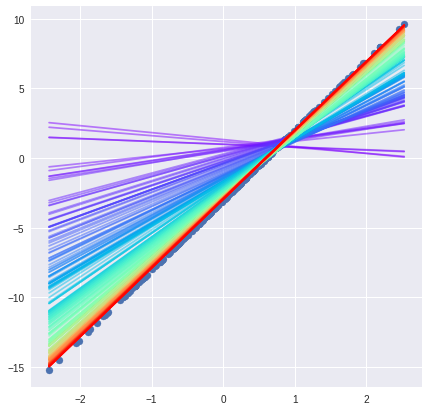

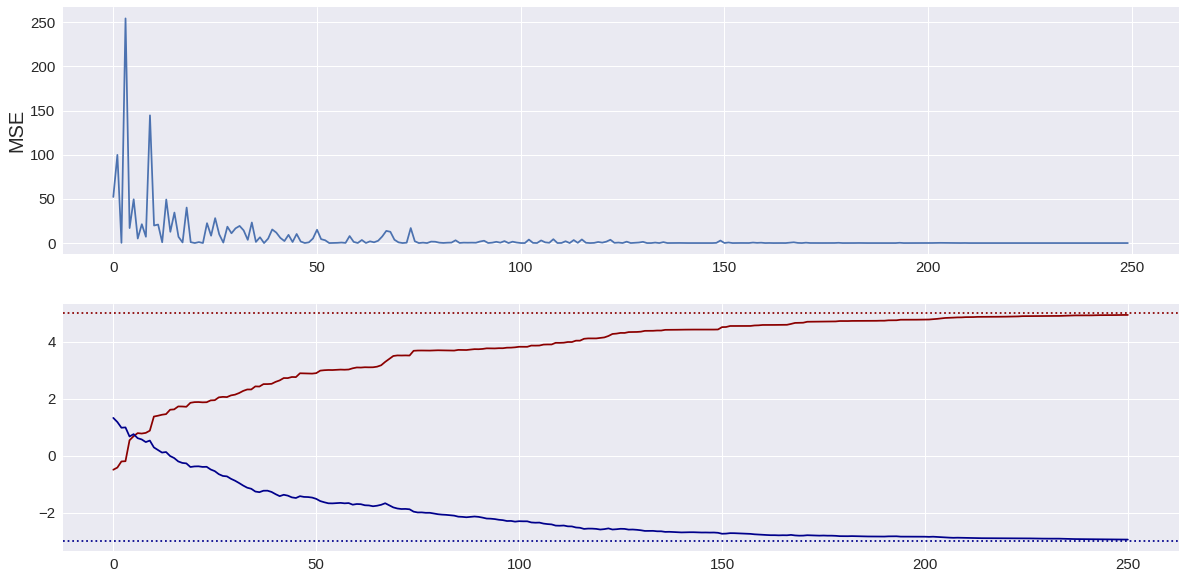

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.random.seed(1)
plt.style.use("seaborn")

#Set params
N = 250
lr = 0.01
target_w, target_b = 5, -3
w, b = np.random.uniform(-3, 3, 2) #trainable parameter (Set randomly)

#Generate dataset
x_data = np.random.randn(N, )
y_data = x_data * target_w + target_b
#y_data += 0.5 * np.random.randn(N, ) #noise 생성

#Visualization
cmap = cm.get_cmap("rainbow", lut = N)
fig, ax = plt.subplots(figsize = (7, 7))
ax.scatter(x_data, y_data)

#Train model and visualize updated models
x_range = np.array([x_data.min(), x_data.max()])
J_track = list()
w_track, b_track = [w], [b]

for data_idx, (x, y) in enumerate(zip(x_data, y_data)):

    #Visualize updated model
    y_range = x_range * w + b
    ax.plot(x_range, y_range, color = cmap(data_idx), alpha = 0.5)

    #Forward propagation
    pred = x * w + b
    J = (y - pred)**2
    J_track.append(J)

    #Jacobians
    dJ_dpred = -2 * (y-pred)
    dpred_dw, dpred_db = x, 1

    #Backpropagation
    dJ_dw = dJ_dpred * dpred_dw
    dJ_db = dJ_dpred * dpred_db

    #Parameter update
    w = w - lr * dJ_dw
    b = b - lr * dJ_db
    w_track.append(w)
    b_track.append(b)

#Visualize results
fig, axes = plt.subplots(2, 1, figsize = (20, 10))
axes[0].plot(J_track)
axes[1].plot(w_track, color = "darkred")
axes[1].plot(b_track, color = "darkblue")

axes[0].set_ylabel("MSE", fontsize = 20)
axes[0].tick_params(labelsize = 15)

axes[1].axhline(y = target_w, color = "darkred", linestyle = ":")
axes[1].axhline(y = target_b, color = "darkblue", linestyle = ":")
axes[1].tick_params(labelsize = 15)